# Equipo 8
Luis Enrique Mora Cortes y Diego Pardo Gonzalez

## Introduccion


En este notebook, exploraremos cómo realizar búsquedas espaciales en **Geopandas** utilizando índices espaciales y buffers. 
Trabajaremos con datos del **DENUE de INEGI** en formato `.gpkg` y aplicaremos un filtro espacial para encontrar consultorios medicos dentro de la ciudad de Puebla en el estado de Puebla.

### Codigo con ejemplo de uso

In [42]:
import geopandas as gpd

In [43]:
# Cargar el archivo .shp
shapefile_path = r"C:\Users\Propietario\Downloads\INEGI_DENUE_02032025.shx"
gdf = gpd.read_file(shapefile_path)


In [44]:
# Guardar como GeoPackage (.gpkg)
gpkg_path = r"C:\Users\Propietario\Downloads"
gdf.to_file(gpkg_path, driver="GPKG")

print(f"Conversión completada: {gpkg_path}")

Conversión completada: C:\Users\Propietario\Downloads


c:\Users\Propietario\anaconda3\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [45]:
# Ruta del archivo .shp (debe ser el .shp, no el .shx)
shapefile_path = r"C:\Users\Propietario\Downloads\INEGI_DENUE_02032025.shp"

# Cargar el Shapefile correctamente
gdf = gpd.read_file(shapefile_path)

# Ruta de salida con el nombre del archivo .gpkg
gpkg_path = r"C:\Users\Propietario\Downloads\INEGI_DENUE_02032025.gpkg"

# Guardar como GeoPackage (.gpkg)
gdf.to_file(gpkg_path, driver="GPKG")

print(f"Conversión completada: {gpkg_path}")


c:\Users\Propietario\anaconda3\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Conversión completada: C:\Users\Propietario\Downloads\INEGI_DENUE_02032025.gpkg


In [46]:
# Confirmacion de correcta creacion de archivo .gpkg
try:
    gdf = gpd.read_file(gpkg_path)
    print("Archivo .gpkg cargado correctamente")
except Exception as e:
    print("Error al leer el archivo:", e)


Archivo .gpkg cargado correctamente


In [47]:
# Recordar ocupar "gdf"
print(gdf.head())
print(len(gdf))

                     geometry
0  POINT (-98.22899 19.03078)
1   POINT (-98.19866 19.0222)
2  POINT (-98.21165 19.04168)
3   POINT (-98.19866 19.0222)
4  POINT (-98.19147 19.03417)
1959


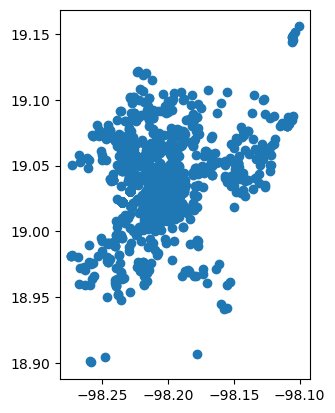

In [48]:
# Visualizacion de datos
import matplotlib.pyplot as plt
gdf.plot()
plt.show()

In [49]:
# Creacion de indices
gdf.sindex
print("Índice espacial creado correctamente")


Índice espacial creado correctamente


In [50]:
# Sindex functions
print("El indice esta vacio? Respuesta:", gdf.sindex.is_empty)
print("Tamaño del indice:", gdf.sindex.size)

print("Lista de predicados validos:", gdf.sindex.valid_query_predicates)

El indice esta vacio? Respuesta: False
Tamaño del indice: 1959
Lista de predicados validos: {'covers', 'contains', 'crosses', 'touches', 'contains_properly', None, 'intersects', 'covered_by', 'dwithin', 'overlaps', 'within'}


In [51]:
from shapely.geometry import Point # crea puntos en coordenadas geograficas

# Buscar negocios dentro de un buffer

consulta_punto = Point(-98.2398, 19.01184)  # Tomé la cordenada de mi casa
buffer = consulta_punto.buffer(0.01)  # Buffer de 1000 metros aproximadamente 
# (las medidas del buffer pueden aumentar cerca de 500 metros si el lugar esta cerca del Ecuador)

indices = gdf.sindex.query(buffer, predicate="intersects")
resultados = gdf.iloc[indices]
print("Numero de consultorios a lo maximo un radio de 1Km del punto:",len(resultados))
print(resultados)

Numero de consultorios a lo maximo un radio de 1Km del punto: 10
                        geometry
1502  POINT (-98.23874 19.00311)
403   POINT (-98.23796 19.00744)
1191  POINT (-98.23954 19.00757)
375   POINT (-98.23509 19.01003)
879   POINT (-98.23268 19.00662)
1111  POINT (-98.23033 19.01042)
1720  POINT (-98.23059 19.01077)
878   POINT (-98.23011 19.01082)
887   POINT (-98.23011 19.01082)
722   POINT (-98.23287 19.01266)


In [54]:
# Setear el punto de consulta
consulta_punto1 = gpd.GeoSeries([Point(-98.2398, 19.01184)], crs=gdf.crs)

# Se busca la geometria (consultorio) mas cercano al punto
indices_cercanos = gdf.sindex.nearest(consulta_punto1.geometry[0])

# Extrae el índice correcto de la estructura `numpy.ndarray`
indice_cercano = indices_cercanos[1][0]  # Extrar el primer valor (indice) que sea valido
negocio_cercano = gdf.iloc[[indice_cercano]]  

# Resultado de busqueda
print("📍 Negocio más cercano:")
print(negocio_cercano)




📍 Negocio más cercano:
                        geometry
1191  POINT (-98.23954 19.00757)


C:\Users\Propietario\AppData\Local\Temp\ipykernel_19124\3349529669.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


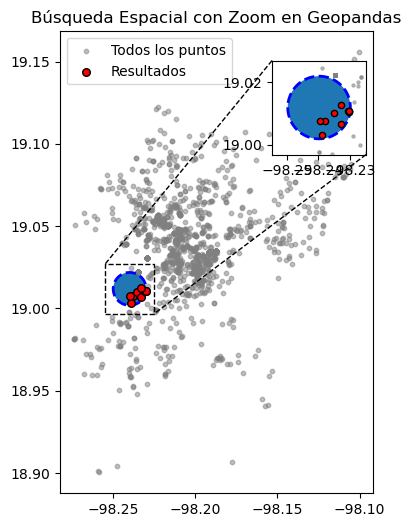

In [53]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Mapa general
gdf.plot(ax=ax, color="gray", alpha=0.5, markersize=10, label="Todos los puntos")
gpd.GeoSeries([buffer]).plot(ax=ax, edgecolor="blue", linestyle="dashed", linewidth=2, label="Área de Búsqueda")
resultados.plot(ax=ax, color="red", marker="o", markersize=30, label="Resultados", edgecolor="black")

# Zona de zoom
xmin, ymin, xmax, ymax = buffer.bounds  # Límites del buffer
ax_zoom = inset_axes(ax, width="30%", height="30%", loc="upper right")  # Crear inset
gdf.plot(ax=ax_zoom, color="gray", alpha=0.5, markersize=5)
gpd.GeoSeries([buffer]).plot(ax=ax_zoom, edgecolor="blue", linestyle="dashed", linewidth=2)
resultados.plot(ax=ax_zoom, color="red", marker="o", markersize=20, edgecolor="black")

# Ajustar zoom al área de búsqueda en el inset
ax_zoom.set_xlim(xmin - 0.005, xmax + 0.005)
ax_zoom.set_ylim(ymin - 0.005, ymax + 0.005)

# Coneccion de figura principal y fig con zoom
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="black", linestyle="dashed")

ax.legend()
ax.set_title("Búsqueda Espacial con Zoom en Geopandas")
plt.show()


### Explicar el funcionamiento de las herramientas (métodos, librerías, funciones, etc.)
Librerias: 

geopandas: Para manejar datos geoespaciales.

matplotlib.pyplot: Para la visualización de los datos en mapas.

shapely.geometry.Point: Para generar puntos y buffers.

mpl_toolkits.axes_grid1.inset_locator: Para crear el zoom en el gráfico.

Funciones:

read_file(): Para cargar archivos geoespaciales en un GeoDataFrame.

plot(): Para visualizar los datos espaciales.

sindex.query(): Para realizar búsquedas en índices espaciales.

buffer(): Para crear un área circular alrededor de un punto.

inset_axes(): Para agregar un gráfico con zoom.

mark_inset(): Para conectar la región de zoom con el gráfico principal.